# FordGoBike System Dataset Exploration and Visualization
**Created by Alex Yu**

## Overview

The bicycle-sharing service is becoming more and more popular across the globe. It allows people in metropolitan areas to rent bicycles by unlocking in one station and return in any other authorized network station. This is very convenient for short trips, especially ideal for one-way trips.

Ford GoBike, which was initiated in 2013, is one of them that was introduced to the US West Coast. Up until now, it has facilitated hundreds of thousands of people and collected millions of usage data since 2017.

## Data Gathering

The data sets are stored in <a href='https://s3.amazonaws.com/fordgobike-data/index.html'>https://s3.amazonaws.com/fordgobike-data/index.html</a>, originally containing **17** files, covering **23** months of data, ranging between **2017-06** to **2019-04**, with nearly **3 million** records.

We download and merge them all programmatically.

## Data Assessing and Cleaning

### ___Original Features Before Assessing and Cleaning___

1. duration_sec
2. start_time
3. end_time
4. start_station_id
5. start_station_name
6. start_station_latitude
7. start_station_longitude
8. end_station_id
9. end_station_name
10. end_station_latitude
11. end_station_longitude
12. bike_id
13. user_type
14. member_birth_year
15. member_gender
16. bike_share_for_all_trip

### ___Features of Interest After Cleaning___

**Numeric Features:**
- `duration_min`
- `trip_distance_km`
- `member_age`

**Categorical Features:**
- `user_type`
- `member_gender`
- `bike_share_for_all_trip`
- `start_time_year_month`
- `start_time_month`
- `start_time_date`
- `start_time_dow`
- `start_time_hour`
- `age_range`



## Univariate Exploration


### Univariate Exploration 1. What does the distribution of duration time for a ride look like?

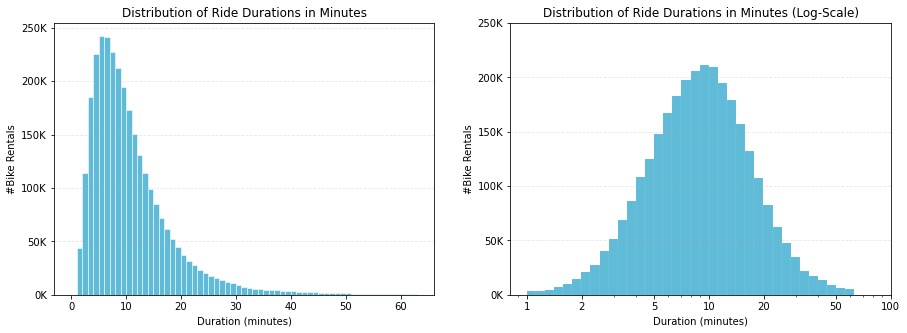

In [63]:
# Set  size of canvas
plt.figure(figsize=(15, 5))

# Plot on the left
plt.subplot(1, 2, 1)
sns.histplot(x=master_clean['duration_min'], \
            bins=np.arange(0, 64, 1), \
            edgecolor="white", \
            color=base_color)
plt.grid(axis='y', linestyle='--', alpha=.3)
orig_ticks = np.arange(0, 300_000, 50_000)
new_ticks = ["{}K".format(int(i/1000)) for i in orig_ticks]
plt.yticks(orig_ticks, new_ticks)

plt.title('Distribution of Ride Durations in Minutes')
plt.xlabel('Duration (minutes)')
plt.ylabel('#Bike Rentals');

# Plot on the right
plt.subplot(1, 2, 2)
# Histogram under `log` scale
sns.histplot(x=master_clean['duration_min'], \
            bins=10**np.arange(0, np.log10(64), .05), \
            edgecolor="white", \
            color=base_color)

# Change the x axis on log-scale
plt.xscale('log')

plt.grid(axis='y', linestyle='--', alpha=.3)
orig_ticks = np.arange(0, 300_000, 50_000)
new_ticks = ["{}K".format(int(i/1000)) for i in orig_ticks]
plt.yticks(orig_ticks, new_ticks)

# Map the x ticks on the axis
ticks = np.array([1, 2, 5, 10, 20, 50, 100])
plt.xticks(ticks, ["{}".format(i) for i in ticks])

# Set title, x-label and y-label
plt.title('Distribution of Ride Durations in Minutes (Log-Scale)')
plt.xlabel('Duration (minutes)')
plt.ylabel('#Bike Rentals');


**Insights for Distribution of Duration Time**

From the histogram **on the left**, we can see that the duration time is a right-skewed distribution. If we put it on a log-scale, **see on the right**, we can get an almost perfect normal distribution.

- Half of the duration time for a ride fall bewteen **5.75 mins (Q1) and 13.9 mins (Q3)** with average value being **12.9 mins**. 
- **95%** of the data fall within **27.3 minuets** and **99%** of the data fall within **63.95 minutes**.
- **Extreme values** can go up to as large as **1438 minutes** (< 1%).
- The distribution pattern seems to be aligned with the <a href='https://www.lyft.com/bikes/bay-wheels/pricing'>policy</a> saying ___Membership includes the first 45 minutes of each trip for free; Rides longer than **45 minutes** are $2 for each additional 15 minutes___. It seems to reveals that each user is really an <a href='https://en.wikipedia.org/wiki/Homo_economicus'>economic man</a>.

### Univariate Exploration 3.What does the distribution of user ages look like?

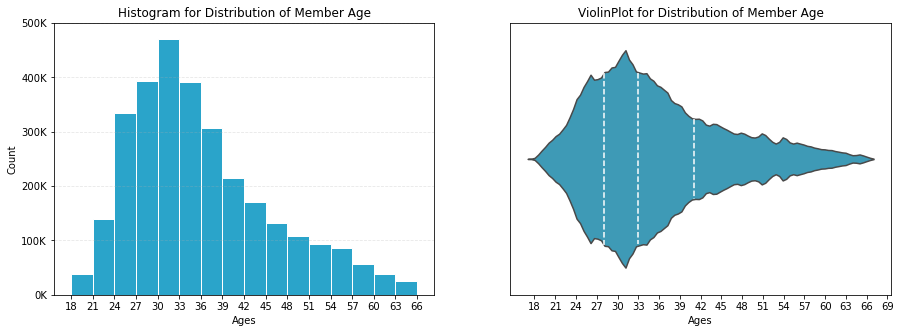

In [71]:
# Set  size of canvas
plt.figure(figsize=(15, 5))

# Draw hisrogram on the left
plt.subplot(1, 2, 1)
bins_interval = 3
bin_edges = range(master_clean.member_age.min(), master_clean.member_age.max()+bins_interval, bins_interval)

plt.hist(master_clean.member_age, bins=bin_edges, edgecolor='white', color=base_color)

plt.grid(axis='y', linestyle='--', alpha=0.3)

orig_ticks = bin_edges
new_ticks = orig_ticks
plt.xticks(orig_ticks, new_ticks)

orig_ticks = np.arange(0, 600_000, 100_000)
new_ticks = ["{}K".format(int(i/1000)) for i in orig_ticks]
plt.yticks(orig_ticks, new_ticks);

plt.title('Histogram for Distribution of Member Age')
plt.xlabel('Ages')
plt.ylabel('Count')


# Draw violin plot on the left
plt.subplot(1, 2, 2)
ax = sns.violinplot(data=master_clean, x='member_age', color=base_color, inner='quartile', )

# Set quartile properties in ViolinPlot
for l in ax.lines:
    l.set_linestyle('--')
    l.set_color('white')

# Set x and y ticks
x_ticks_old = np.arange(18, 70, 3)
plt.xticks(x_ticks_old, ["{}".format(int(i)) for i in x_ticks_old])
plt.yticks([])

# Add title and x label
plt.title('ViolinPlot for Distribution of Member Age')
plt.xlabel('Ages');

**Insights for Distribution of User Age**

- The average age for all users is ___33___ year-old, with ___minimum age 18___ and ___maximum age 66___.
- The distribution of user ages is right-skewed as can be seen from the histogram on the left, with a longer tail up to 66 years-old.
- Most of the users' ages range between ___27 and 42___ (interquartile range), more specifically ___between 30 and 33___, after which the counting trend decreases gradually.
- Ages between **10-20** and **60+** have the least numbers.


### Univariate Exploration 4. How are the users in different genders distributed?

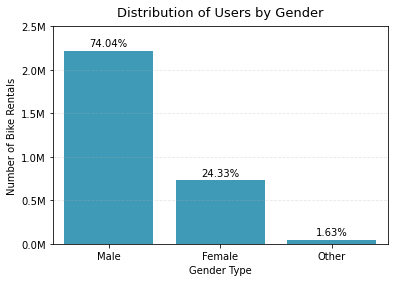

In [74]:
vertical_bar_plots(col='member_gender', \
                   x_label='Gender Type', \
                   title_='Distribution of Users by Gender', \
                   y_min=0, 
                   y_max=3_000_000, 
                   interval=500_000)

**Insight for Distribution of Users by Gender**

- **Male** users play a dominant role, covering **74%** or **2.2 million** of bike rental users.
- **Female** users covers slightly less than **1/4** of bike rental users.
- Users gender classfied as **Other** have the least numbers, only covering **1.6%** of the whole.


### Univariate Exploration 5. How are the users in different user types distributed?

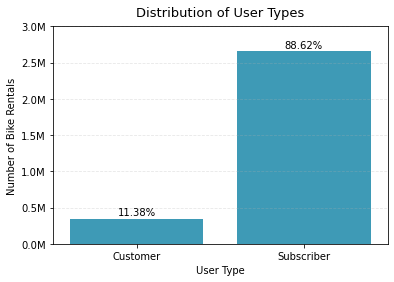

In [76]:
vertical_bar_plots(col='user_type', \
                   x_label='User Type', \
                   title_='Distribution of User Types', \
                   y_min=0, 
                   y_max=3_500_000, 
                   interval=500_000)

**Insight for Distribution of Users by User Type**

- There are **two** user types in data - `Customer` and `Subscriber`.
- The differences between these two types is obvious and the gap in bewteen is so huge that the number of **subscribers** is almost as **8** times as that of **customers**. The reason for this maybe because being a subscriber can bring more benefits such as less pricing, additional coupons, better service etc.


<a id='total_rentals'></a>
### Univariate Exploration 7. Bike Rentals Trend by Month

In the following, I will explore what the trend is like for the bike rentals from **June 2017 to April, 2019**.

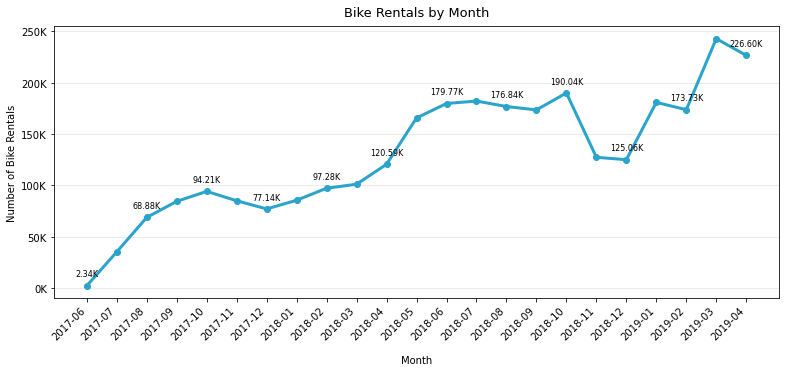

In [79]:
month_df = master_clean.resample('M', on='start_time').bike_id.count().to_frame().reset_index()
month_df.start_time = month_df.start_time.astype(str)

plt.figure(figsize=(13, 5))
plt.plot(month_df['start_time'].str.slice(0, 7), \
         month_df.bike_id, \
         color=base_color, \
         linewidth=3, \
         marker='o')

plt.grid(axis='y', alpha=0.3)

plt.xticks(rotation=45, ha='right')

# Add label for x and y axis 
plt.xlabel("Month", labelpad=13)
plt.ylabel("Number of Bike Rentals")

# Change the unit representation for y ticks
orig_ticks = np.arange(0, 300_000, 50_000)
new_ticks = ["{}K".format(int(i/1000)) for i in orig_ticks]
plt.yticks(orig_ticks, new_ticks)

# Add relative frequency as text on the plot
for i in range (month_df.shape[0]):
    counts = month_df.iloc[i, 1]
    if i % 2 == 0:
        pct_string = '{:.2f}K'.format(counts/1000)
        plt.text(i, counts+9000, pct_string, ha='center', fontdict={'fontsize':8})

# Add title
plt.title("Bike Rentals by Month", fontdict={'fontsize':13}, pad=10);

<a id='user_type_conclusion'></a>
**Insight on Bike Rentals Trend by Year-Month**
 
- As we can see, the general trend for the bike rentals is increasing over the years. At the beginning of 2017-06, there are only **2 thousand**, however in **23 months**, the total number mounts up to **220 thousand**, almost **100 times** larger. 
- Although the trend is increasing, it is not strictly linear but several obvious ups and downs. ___Interestingly___, it seems all the sharp increases concentrate in the first half of a year. The peaks arrive at around ___October___ of the year. After that, it begins to decline. So there seems to be a **seasonal reason** for this as winter comes in and temperature is low, people tend not to choose bike as their transporation tool. But in pleasing climate like spring and summer with cozy weather conditions and sufficient sunlights, people tend to rent bicycle as a way to get close to nature.

### Univariate Exploration 8. Distribution of Bike Rentals by Day in a  Week

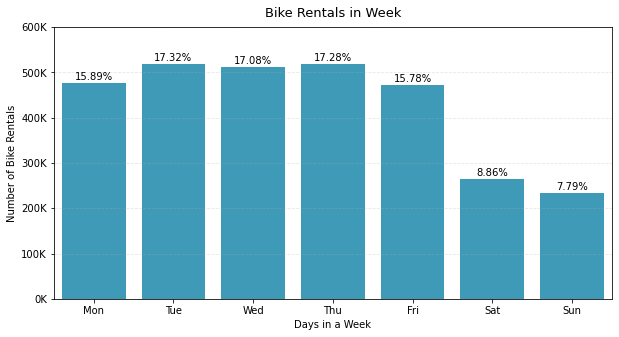

In [81]:
# Set figure size
plt.figure(figsize=fig_size)

# Plotting
vertical_bar_plots(col='start_time_dow', \
                   x_label='Days in a Week', \
                   title_='Bike Rentals in Week', \
                   y_min=0, 
                   y_max=650_000, 
                   interval=100_000, \
                   pct_text_alignment=7000, \
                   y_tick_unit='K')

**Insight on Bike Rentals Trend by Year-Month**
 
- The result shows clearly that bike rentals on weekdays are far more than that on weekends, almost **2 times** as large.
- During weekdays, bike rentals happen the most on ___Tuesday, Wednesday and Thursday___, with very close percentage, while rentals on ___Monday and Friday___ are another group that shares similar percentage but as lower as about **2 percentage point** than that of the former one.

### Univariate Exploration 9. Distribution of Bike Rentals in Different Hours of a Day.

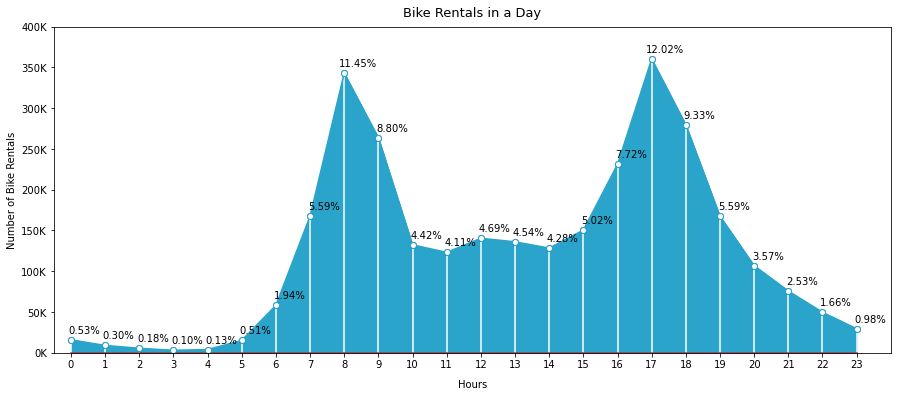

In [82]:
# Construct the dataframe for plotting
## Calculate the counts by hours in a day
vals_hours_counts = master_clean.start_time_hour.value_counts().sort_index()
idx_hours_counts = master_clean.start_time_hour.value_counts().sort_index().index

#
plt.figure(figsize=(15, 6))

# Plot a vertical line between point on curve and x axis
plt.stem(idx_hours_counts, vals_hours_counts, linefmt='white')

# Draw line plot with markers
plt.plot(vals_hours_counts, marker='o', markerfacecolor='white', color=base_color)


# Fill color between 
plt.fill_between(idx_hours_counts, vals_hours_counts, color=base_color, )

# Calculate counts for each component under a categorical feature
each_counts = master_clean['start_time_hour'].value_counts(sort=False)

# Add relative frequency text for each
total_counts = master_clean.shape[0]

# Add relative frequency as text on the plot
for i in range (each_counts.shape[0]):
    counts = each_counts[i]
    pct_string = '{:.2f}%'.format(100*counts/total_counts)
    plt.text(i+.4, counts+8000, pct_string, ha='center')

# Change the unit representation for y ticks
orig_ticks = np.arange(0, 450_000, 50_000)
new_ticks = ["{}K".format(int(i/1000)) for i in orig_ticks]
plt.yticks(orig_ticks, new_ticks)

# Set x ticks and label on the x axis
plt.xticks(range(0, 24))
plt.xlabel('Hours', labelpad=10)
plt.ylabel('Number of Bike Rentals')

# Change the x and y limit and margins for visual purpose
plt.xlim((-.5, 24))
plt.ylim((0, 400_000))
plt.margins(y=0)

# Set the title for the plot
plt.title('Bike Rentals in a Day', fontdict={'fontsize':13}, pad=10);

**Insight on Bike Rentals Trend in Different Hours of a Day**
 
- As can be seen from above, there are two apparent **humps** in the graph: **7:00 - 9:00 in the morning** and **16:00 - 19:00 in the evening**, a.k.a. the ___rush hours___, and the period of rush hour in the evening seems a little bit longer than that in the moring as it presents wider hump in the graph.
- During the ___office hours___, namely the period between 10:00 and 14:00, the rental percentage is only 1/3 or 1/2 of that in the peak period.
- We may guess that the dominant users for the bike rentals are from working class.

## Bivariate Exploration


### Bivairiate Exploration 1. How do the bike rentals vary with time among different user types?

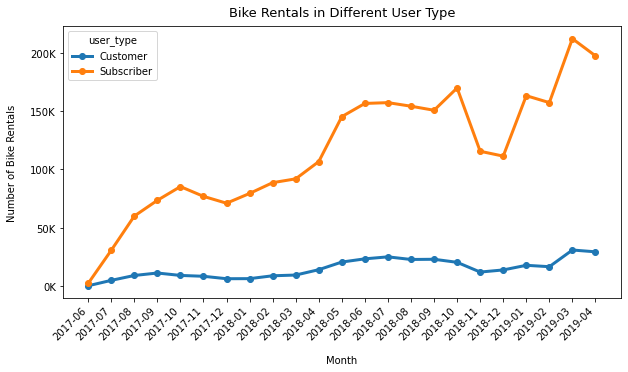

In [84]:
# Construct the dataframe for plotting
df_yearMonth_userType = master_clean.groupby(['start_time_year_month', 'user_type']).size().reset_index()
df_yearMonth_userType.rename(columns={0: 'counts'}, inplace=True)

df_yearMonth_userType = df_yearMonth_userType.pivot_table(values='counts',
                                index='start_time_year_month',
                                columns='user_type')


df_yearMonth_userType.index = df_yearMonth_userType.index.astype(str)

# df_yearMonth_userType

# Line plot with marker
df_yearMonth_userType.plot(marker='o', figsize=fig_size, linewidth=3)

# Change x ticks to improve readibility
plt.xticks(range(23), list(df_yearMonth_userType.index), rotation=45, ha='right');

# Change the unit representation for y ticks
orig_ticks = np.arange(0, 250_000, 50_000)
new_ticks = ["{}K".format(int(i/1000)) for i in orig_ticks]
plt.yticks(orig_ticks, new_ticks)

# Add label for x and y axis 
plt.xlabel("Month", labelpad=13)
plt.ylabel("Number of Bike Rentals", labelpad=13)

# Add title
plt.title("Bike Rentals in Different User Type", fontdict={'fontsize':13}, pad=10);

#### Insight on the bike rentals for different user types

- The users with **Subscriber** type present similar trend to the general trend we found earlier in univariate exploration : the **seasonal trend**, while for **Customer** user type, it does not show much change with time.

### Bivariate Exploration 4. How do the bike rentals vary with time for different age ranges?

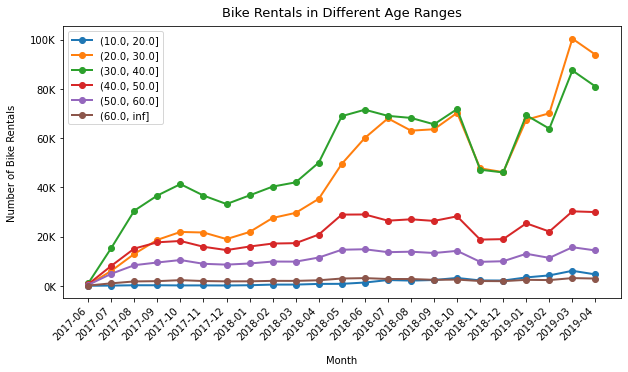

In [87]:
df_yearMonth_age = master_clean.groupby(['start_time_year_month', 'age_range']).size().reset_index()
df_yearMonth_age.rename(columns={0: 'counts'}, inplace=True)

df_yearMonth_age = df_yearMonth_age.pivot_table(values='counts',
                                index='start_time_year_month',
                                columns='age_range')


df_yearMonth_age.index = df_yearMonth_age.index.astype(str)

# df_yearMonth_userType

# Line plot with marker
df_yearMonth_age.plot(marker='o', figsize=fig_size, linewidth=2)

# Change x ticks to improve readibility
plt.xticks(range(23), list(df_yearMonth_age.index), rotation=45, ha='right');

# Change the unit representation for y ticks
orig_ticks = np.arange(0, 120_000, 20_000)
new_ticks = ["{}K".format(int(i/1000)) for i in orig_ticks]
plt.yticks(orig_ticks, new_ticks)

# Add label for x and y axis 
plt.xlabel("Month", labelpad=13)
plt.ylabel("Number of Bike Rentals", labelpad=13)

# Add title
plt.title("Bike Rentals in Different Age Ranges", fontdict={'fontsize':13}, pad=10)

plt.legend(loc='upper left');

#### Insight on bike rentals trend in different age range

The graph above shows that

- The majority of users are between **20 - 40 years old**.


- **(10, 20] group** and **(60, inf) group** do not show much change with time, while the other groups show again the **seasonal trend** to some extent, i.e. for groups of **(20, 30], (30, 40], (50, 60]**, this pattern is obvious and strong especially in users with age range of **(20, 30] and (30, 40] y/o**.


- Users in **(20, 30]** group climb up fast since 2018-04 and surpass the number of users in **(30, 40]** group the first time in 2018-11.

### Bivariate Exploration 6. Average duration time and trip distance distribution in ages.

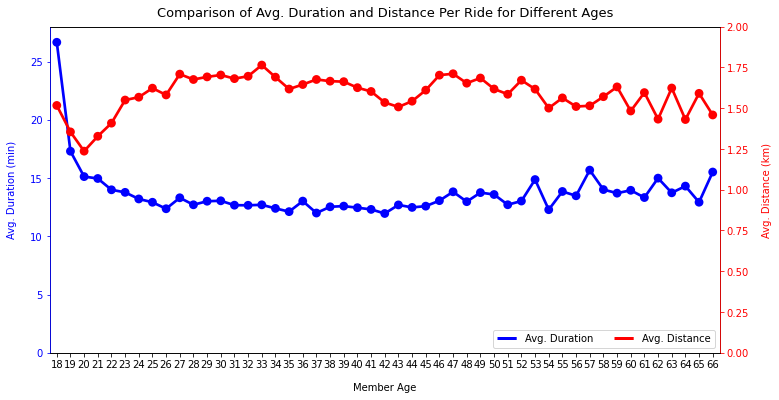

In [92]:
from matplotlib.lines import Line2D

fig, ax1 = plt.subplots(figsize=(12, 6))

# Two axes share the same x axis
ax2 = ax1.twinx()

# Make the avg.distance curve, colored in 'blue'
sns.pointplot(data=master_clean, \
              x='member_age', \
              y='duration_min', \
              color='blue', \
              ci=None, \
              ax=ax1)


# Make the avg.distance curve, colored in 'red'
sns.pointplot(data=master_clean, \
              x='member_age', \
              y='trip_distance_km', \
              ci=None, \
              color='red', \
              ax=ax2);

# Add legend to each curve
colors = ['blue', 'red']
lines = [Line2D([0], [0], color=c, linewidth=3, linestyle='-.') for c in colors]
labels = ['Avg. Duration', 'Avg. Distance']
plt.legend(lines, labels, ncol=2, loc='lower right')

# Customize properties of the x label
ax1.set_xlabel('Member Age', labelpad=13, fontsize=10)

# Customize y label properties for ax1
ax1.set_ylabel('Avg. Duration (min)', color='blue', labelpad=13, fontsize=10)
ax1.tick_params(axis='y', colors='blue')
ax1.set_ylim(0, 28)

# Customize y label properties for ax2
ax2.set_ylabel('Avg. Distance (km)', color='red', labelpad=13, fontsize=10)
ax2.spines['left'].set_color('blue')
ax2.tick_params(axis='y', colors='red')
ax2.spines['right'].set_color('red')
ax2.set_ylim(0, 2)

# Add title
plt.title("Comparison of Avg. Duration and Distance Per Ride for Different Ages", fontdict={'fontsize':13}, pad=10);




#### Insights:

**From the <font color='blue'>Blue curve</font> we can tell that:**,

- There happen to be large average duration values for a trip, for example, the **18 - 23 y/o** range, among which the largest one gets around **27km** with large uncertainty as well. It drops sharply afterwards till 25 y/o. 

- The **25 - 52 y/o** users have relatively steady average time for a ride indicating that this group of people may share similar bahavior or purpose like renting bicycles for commuting to work.

- Among older ages like **53 y/o or plus**, the average duration time have larger fluctuations with larger confidence intervals.


**From the <font color='red'>Red curve</font>, we can tell that:**
- Except for users at 26 y/o or younger, the general trend for average trip distance per ride is **decreasing gradually** as people gets older.

- The difference of average distance among different ages is small, for example for users among **23 - 66 y/o**, their average distance for a ride is always among **1.5km - 1.76km** range, less than 300m.



## Multivariate Exploration


<a id='mul3'></a>
### Multi-variate Exploration 3. How do the average duration time and trip distance vary with time by different user genders? 

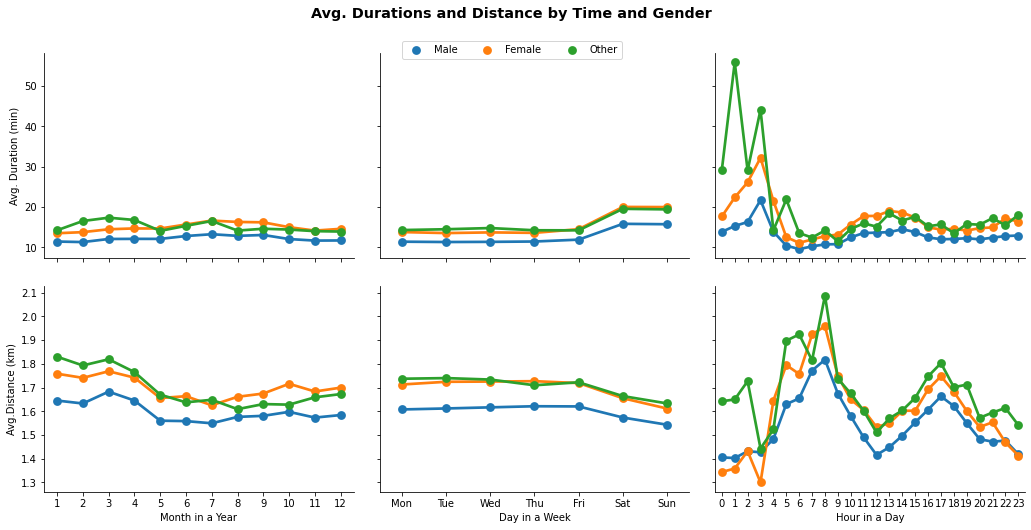

In [97]:
num_vars = ['duration_min', 'trip_distance_km']
cat_vars = ['start_time_month', 'start_time_dow', 'start_time_hour']

g = sns.PairGrid(data = master_clean, \
                 x_vars = cat_vars, \
                 y_vars = num_vars, \
                 height = 2, \
                 aspect = 2, \
                 hue='member_gender')


g.map(sns.pointplot, ci=None, linewidth=.2)
g.fig.set_figheight(8)
g.fig.set_figwidth(15)

# g.add_legend()
handles = g._legend_data.values()
labels = g._legend_data.keys()
g.fig.legend(handles=handles, labels=labels, loc='upper center', ncol=3, bbox_to_anchor=(0, .93, 1, 0))


# Title for the complete figure
g.fig.suptitle("Avg. Durations and Distance by Time and Gender" ,
               fontsize = 'x-large' , 
               fontweight = 'bold' )
  
# Adjust subplots so that titles don't overlap
g.fig.subplots_adjust( top = 0.9 )

replacements = {'start_time_month': 'Month in a Year', 'start_time_dow': 'Day in a Week',
                'trip_distance_km': 'Avg.Distance (km)', 'petal_width': 'petal',
                'duration_min': 'Avg. Duration (min)', 'start_time_hour': 'Hour in a Day'}

# Customize axis labels
for i in range(2):
    for j in range(3):
        xlabel = g.axes[i][j].get_xlabel()
        ylabel = g.axes[i][j].get_ylabel()
        if xlabel in replacements.keys():
            g.axes[i][j].set_xlabel(replacements[xlabel])
        if ylabel in replacements.keys():
            g.axes[i][j].set_ylabel(replacements[ylabel]);
            


#### Insights

- In all these six plots, **Male** curves tend to be mostly underneath the curves of other two types of gender.


- In the ___plot(0, 0)___, **for males** the average duration time in each month is relatively stable thoughout the year; **For females** the average duration in the first half of a year is slightly larger and more fluctuated than that in the second half of a year. Compared with the average distance for a ride in the ___plot(1, 0)___, all three curves seem to decrease gradually as month varies.


- In the ___plot(0, 1)___, the curves follow very similar trend for all three types of gender, that is, on weekdays, average duration time is shorter tha that at the weekends. Further more, the average values for ***Female* and **Other** are almost the same. In terms of average distance for rides (**See the plot(1, 1)**), all three curves present similar trend as well, that is, on weekdays, the values are larger than that at the weekends. Further more, the average values for **Female** and **Other** are quite close to each other.


- In the ___plot(0, 2)___, the **other** gender curve is more fluctuated. But the three curves all seem to have two lower valleys which are **5:00 - 9:00 in the morning** and **16:00 - 19:00 in the evening**. While in ___plot(1, 2)___, the trend is just the opposite to the average duration time curves: two humps happen around **8:00** in the morning and **17:00** in the evening. ___Interestingly___, it seems during these periods, **users tend to spend the least time to make the longest distance.**

<font color='grey'>___Notice: the index of plots is numbered 0-based, from left to right and top to bottom.___</font>

### Multi-variate Exploration 4. How do the average duration time and trip distance vary with time by different user types? 

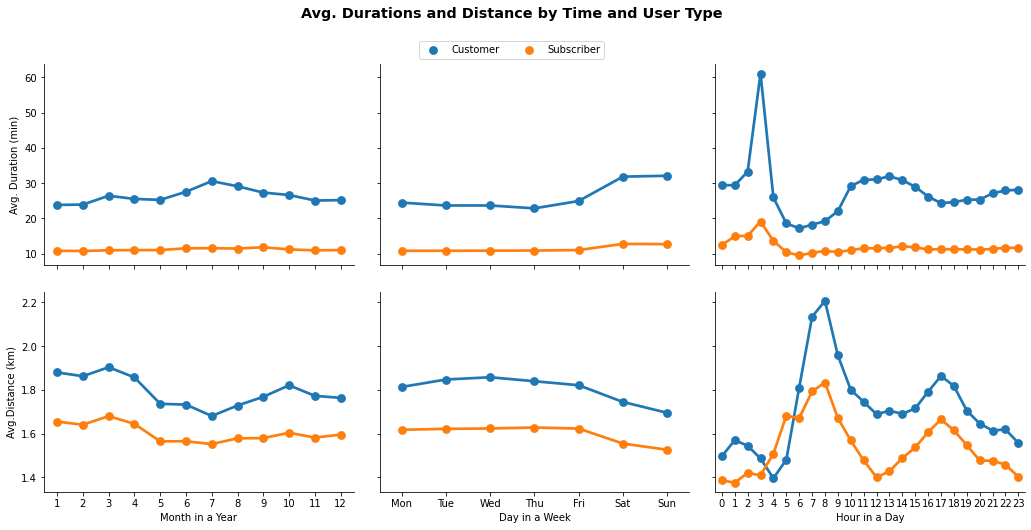

In [98]:
num_vars = ['duration_min', 'trip_distance_km']
cat_vars = ['start_time_month', 'start_time_dow', 'start_time_hour']

g = sns.PairGrid(data = master_clean, \
                 x_vars = cat_vars, \
                 y_vars = num_vars, \
                 height = 2, \
                 aspect = 2, \
                 hue='user_type', \
                 palette='tab10')

g.map(sns.pointplot, ci=None, linewidth=.2)
g.fig.set_figheight(8)
g.fig.set_figwidth(15)

handles = g._legend_data.values()
labels = g._legend_data.keys()
g.fig.legend(handles=handles, labels=labels, loc='upper center', ncol=2, bbox_to_anchor=(0, .93, 1, 0))
# g.fig.subplots_adjust(top=.8, bottom=0)

# Title for the complete figure
g.fig.suptitle("Avg. Durations and Distance by Time and User Type" ,
               fontsize = 'x-large' , 
               fontweight = 'bold' )
  
# Adjust subplots so that titles don't overlap
g.fig.subplots_adjust( top = 0.88 )

replacements = {'start_time_month': 'Month in a Year', 'start_time_dow': 'Day in a Week',
                'trip_distance_km': 'Avg.Distance (km)', 'petal_width': 'petal',
                'duration_min': 'Avg. Duration (min)', 'start_time_hour': 'Hour in a Day'}

# Improve readibility for axis labels
for i in range(2):
    for j in range(3):
        xlabel = g.axes[i][j].get_xlabel()
        ylabel = g.axes[i][j].get_ylabel()
        if xlabel in replacements.keys():
            g.axes[i][j].set_xlabel(replacements[xlabel])
        if ylabel in replacements.keys():
            g.axes[i][j].set_ylabel(replacements[ylabel]);

#### Insights

- Both the average duration time and distance per ride for users in **Subscriber** type, tend to have lower values than that of the **Customer** user type, except for ___plot(1, 2)___. During **4:00 and 5:00 am**, average distance for **Subscribers** surpasses the **Customer** user type for the first and only time.


- In terms of average duration time, the **Subscriber** user type seems to have more stable curves, compare with the **Customer** group. 


- When zoomed in the scale of hours in a day, the curves tend to be more fluctuating, no matter it's average duration  time or diatance. In ___plot(0, 2)___, **7:00 - 10:00 in the morning**, the duration time difference between **Customer** and **Subscriber** becomes larger as average duration time in **Customer** is increasing while that in **Subscriber** is relatively stable.


- When zoomed in the scale of hours in a day, there are two obvious humps in terms of average distance for a ride (**See plot(1, 2)**). This trend is similar to what we have analyze in the **univariate exploration part 9.** That is, the humps tend to occur during the **rush hour in the morning** and **rush hour in the evening**.

<font color='grey'>___Notice: the index of plots is numbered 0-based, from left to right and top to bottom.___</font>

### Multi-Variate Exploration 7. What is the rental pattern for different user types based on days of a week v.s hours in a day?

/Users/alejandrosanz/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:64: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  self.fig.tight_layout(*args, **kwargs)


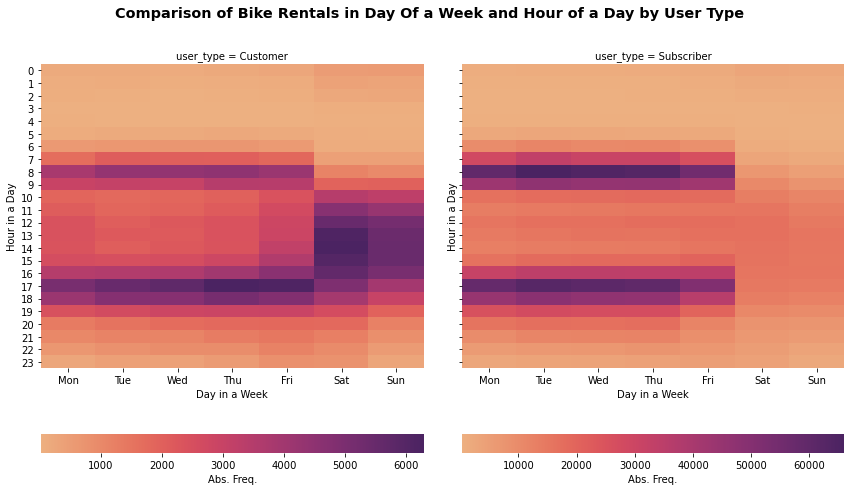

In [104]:
def draw_heatmap(*args, **kwargs):
    """Construct the dataframe and create heatmap."""
    data = kwargs.pop('data')
    d = data.pivot(index=args[0], columns=args[1], values=args[2])
    sns.heatmap(d, **kwargs)

# Instantiate a `FacetGrid` object
fg = sns.FacetGrid(type_df, col='user_type', height=8, aspect=.9, gridspec_kws={"wspace":0.1})

# Map heatmap object with `FacetGrid` object
fg.map_dataframe(draw_heatmap, \
                 'start_time_hour', \
                 'start_time_dow', \
                 'bike_id', \
                 cmap='flare', \
                 cbar=True, \
                 cbar_kws={"orientation": "horizontal", 'label':'Abs. Freq.'})

# Reset x and y labels
fg.axes[0,0].set_xlabel('Day in a Week')
fg.axes[0,1].set_xlabel('Day in a Week')
fg.axes[0,0].set_ylabel('Hour in a Day')
fg.axes[0,1].set_ylabel('Hour in a Day')

fg.fig.suptitle("Comparison of Bike Rentals in Day Of a Week and Hour of a Day by User Type" ,
               fontsize = 'x-large' , 
               fontweight = 'bold' );


#### Insights

From the heatmaps, we can clearly see some interesting patterns for the bicycle rental behaviors for different user types although the counts of rentals for **Subscribers** are as **10 times** large as that for **Customers**:

- From **Monday to Friday**, the rentals mostly happen during commute hours which are **7:00 - 9:00 in the morning** and **16:00 - 18:00** in the afternoon, no matter what kind of user type they belong to.


- On **Saturday and Sunday**, the difference between these two user types occurs: **Customer users** tend to rent bikes during weekends more often than they do on weekdays, especially during the period **from 10:00 in the morning to 16:00 in the afternoon**. However, **Subscriber users** seem to have disappeared during that period at the weekends, maybe they prefer taking a tour without bicycles or just relaxing at home.

<a id='mul8'></a>
### Multi-Variate Exploration 8. For different user type, what rental pattern does it have for different age ranges?


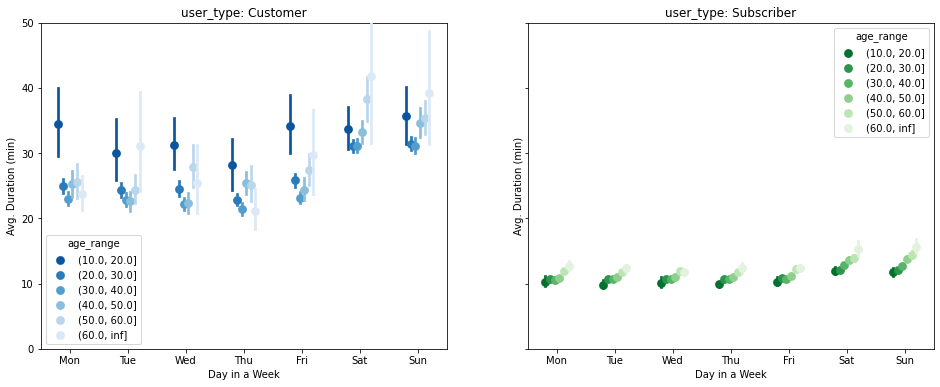

In [105]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = [16,6], sharey=True)


sns.pointplot(data = master_clean[master_clean.user_type=='Customer'], \
              x = 'start_time_dow', \
              y = 'duration_min', \
              hue = 'age_range', \
              palette = 'Blues_r', \
              linestyles = '', \
              dodge = 0.4, \
              ax=ax1)
ax1.set_title('user_type: Customer')
ax1.set_xlabel('Day in a Week')
ax1.set_ylabel('Avg. Duration (min)')
ax1.set_ylim((0, 50));


sns.pointplot(data = master_clean[master_clean.user_type=='Subscriber'], \
              x = 'start_time_dow', \
              y = 'duration_min', \
              hue = 'age_range', \
              palette = 'Greens_r', \
              linestyles = '', \
              dodge = 0.4, \
              ax=ax2);

ax2.set_title('user_type: Subscriber')
ax2.set_xlabel('Day in a Week')
ax2.set_ylabel('Avg. Duration (min)');


#### Insights

- **On weekdays**, the general level of average time spent by people from all age groups is obviously **lower** than that **at the weekends**, regardless of which **user type** they are.


- For **Customer** user type, the average duration time distribution for different age ranges throughout days of a week mostly look like letter **V shape** on the point plots although there are a few exceptions. Generally, younger and older users are prone to spend longer average time for a ride, while users **between 20 and 50** spend less. 


- For **Customer** user type, the confidence interval at the two ends of age ranges is wider than the others as those samples are very small.


- For **Subscriber** user type, the average duration time distribution for different age ranges throughout days of a week are **more stable**: **Subscriber** users at younger age spend less average duration time for a ride, and as their ages grow, they tend to spend longer.


- For **Subscriber** user type, the distribution pattern from **Monday to Friday** is **quite similar** which implies that they almost spend the same duration time for a ride every weekday.

#### II. average trip distance v.s. days of a week

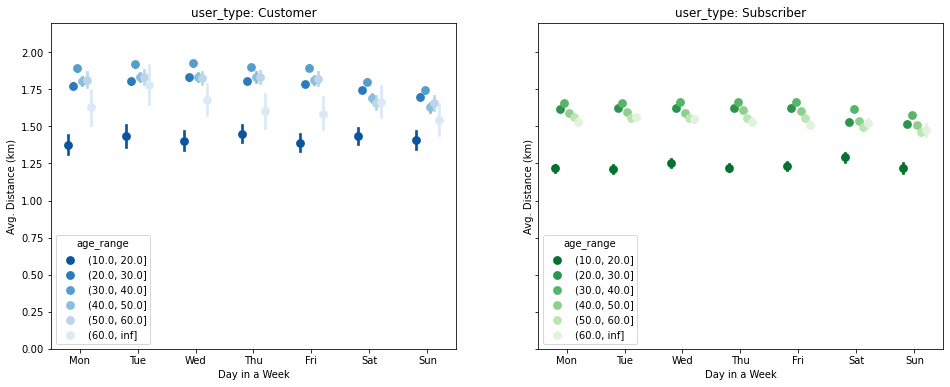

In [106]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = [16,6], sharey=True)


sns.pointplot(data = master_clean[master_clean.user_type=='Customer'], \
              x = 'start_time_dow', \
              y = 'trip_distance_km', \
              hue = 'age_range', \
              palette = 'Blues_r', \
              linestyles = '', \
              dodge = 0.4, \
              ax=ax1)
ax1.set_title('user_type: Customer')
ax1.set_xlabel('Day in a Week')
ax1.set_ylabel('Avg. Distance (km)')
ax1.set_ylim((0, 2.2));


sns.pointplot(data = master_clean[master_clean.user_type=='Subscriber'], \
              x = 'start_time_dow', \
              y = 'trip_distance_km', \
              hue = 'age_range', \
              palette = 'Greens_r', \
              linestyles = '', \
              dodge = 0.4, \
              ax=ax2);

ax2.set_title('user_type: Subscriber')
ax2.set_xlabel('Day in a Week')
ax2.set_ylabel('Avg. Distance (km)');


#### Insights

- Generally speaking, avg. distance values in **Subscriber** user type are relatively lower than that in **Customer** user type.


- Avg. disrance values of users in the age range of **(10, 20]** are distributed far away from the others, that is, values of users in the age range of **20 - 60** are more clustered together.


- Regardless of the **(10, 20]** group, avg. distances exhibit similar pattern: values are very close to each other, although they're generally larger **on weekdays** while smaller **at the weends**, no matter which **user type** they belong to.

<a id='mul9'></a>
### Multi-Variate Exploration 9. For different genders, what rental pattern does it have for different age ranges?

#### I. average duration time v.s. days of a week

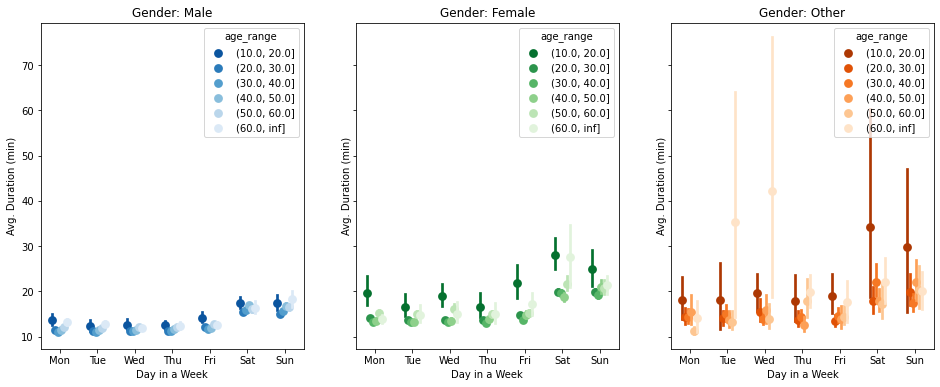

In [107]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = [16,6], sharey=True)


sns.pointplot(data = master_clean[master_clean.member_gender=='Male'], \
              x = 'start_time_dow', \
              y = 'duration_min', \
              hue = 'age_range', \
              palette = 'Blues_r', \
              linestyles = '', \
              dodge = 0.4, \
              ax=ax1)
ax1.set_title('Gender: Male')
ax1.set_xlabel('Day in a Week')
ax1.set_ylabel('Avg. Duration (min)');


sns.pointplot(data = master_clean[master_clean.member_gender=='Female'], \
              x = 'start_time_dow', \
              y = 'duration_min', \
              hue = 'age_range', \
              palette = 'Greens_r', \
              linestyles = '', \
              dodge = 0.4, \
              ax=ax2);

ax2.set_title('Gender: Female')
ax2.set_xlabel('Day in a Week')
ax2.set_ylabel('Avg. Duration (min)');

sns.pointplot(data = master_clean[master_clean.member_gender=='Other'], \
              x = 'start_time_dow', \
              y = 'duration_min', \
              hue = 'age_range', \
              palette = 'Oranges_r', \
              linestyles = '', \
              dodge = 0.4, \
              ax=ax3);

ax3.set_title('Gender: Other')
ax3.set_xlabel('Day in a Week')
ax3.set_ylabel('Avg. Duration (min)');

### Insights

As can be seen from above:

- **On weekdays**, the general level of average time spent by people from all age groups is obviously **lower** than that **at the weekends**, regardless of which gender they belong to.


- For **Male** users, their average duration time across all age ranges is closer or tightly distributed, while for the other two genders, the distribution of average duration time is slightly wide-scattered, especially for younger users.


- For each of the three pointplots above, the general pattern between average duration time and days in a week among different age ranges is **consistent**. And it also shows a **V shape** distribution as we observed in  the previous part.